In [ ]:
# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [1]:
import pandas as pd

data = pd.read_csv('data/loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [5]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2072-09-17,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [25]:
# Task 1
# Step 1.1
# Criteia 1 : If over 50% of the values of a column are missing, the column should be removed from the data frame;

missing_criteria = len(data) * 0.5  
columns_to_keep = data.columns[data.isnull().sum() <= missing_criteria]
loan_data_cleaned = data[columns_to_keep]

# Criteria 2 : For a categorical column, if a row contains a missing value, you need to delete the whole row

cat_columns = loan_data_cleaned.select_dtypes(include=['object']).columns
loan_data_cleaned = loan_data_cleaned.dropna(subset=cat_columns)

# Criteria 3 : For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

num_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in num_columns:
    mean_value = loan_data_cleaned[col].mean()
    loan_data_cleaned[col] = loan_data_cleaned[col].fillna(mean_value)
    
# To print the shape of the cleaned data

print("Shape of the cleaned data:", loan_data_cleaned.shape)

# To check if there is any null value after cleaning the dataset
print("Remaining missing values in each column:\n", loan_data_cleaned.isnull().sum())



Shape of the cleaned data: (19900, 35)
Remaining missing values in each column:
 ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure              

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [26]:
# Step 1.2
#To display the columns present in the cleaned dataset

print("Available columns in the cleaned dataset:", loan_data_cleaned.columns)

# To filter out any invalid columns in cat_columns as given above

cat_columns = [col for col in cat_columns if col in loan_data_cleaned.columns]

# To identify and remove columns where all categorical values are unique according to the question as they do not provide any statistical information.

columns_to_remove = []
for column in cat_columns:
    if loan_data_cleaned[column].nunique() == len(loan_data_cleaned):  # To check if all values are unique
        columns_to_remove.append(column)  # To Append column to the removal list

# To drop the identified columns(above) from the DataFrame.

loan_data_cleaned = loan_data_cleaned.drop(columns=columns_to_remove)

# To convert the remaining categorical columns into one-hot encoded format.
loan_data_encoded = pd.get_dummies(loan_data_cleaned, drop_first=True)

# To use one hot encoding to convert the categorical values into numerical ones.
# To convert boolean columns (from one-hot encoding:True and False) to integers (0 and 1).

loan_data_encoded = loan_data_encoded.astype(int)

# To display the new shape of the dataset.

print("Shape of the dataset after encoding:", loan_data_encoded.shape)

# To preview the first few rows of the encoded data.
print("Preview of the encoded dataset:\n", loan_data_encoded.head())





Available columns in the cleaned dataset: Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')
Shape of the dataset after encoding: (19900, 45)
Preview of the encoded dataset:
    Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0   4

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [28]:
# Task 2
# Step 2.1
from sklearn.model_selection import train_test_split

# To define the label (prediction target) and features (all other attributes)

label_column = 'LoanApproved'
feature_columns = loan_data_encoded.drop(columns=[label_column])  # To exclude label from features.
target_values = loan_data_encoded[label_column]  # The label (LoanApproved) is what we aim to predict as per the question above.

# To split the dataset into training (80%) and testing (20%) sets.
# The random_state is set to my student ID(48682764) for personalised results as per the instructions given above.
X_train, X_test, y_train, y_test = train_test_split(
    feature_columns,    # Features specified above
    target_values,      # Labels ("LoanApproved")
    test_size=0.2,      # 20% for testing as splitted above
    random_state=48682764  # Ensuring personalized splits with my student ID(48682764)
)

# To Display the shape of the training and testing datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training features shape: (15920, 44)
Testing features shape: (3980, 44)
Training labels shape: (15920,)
Testing labels shape: (3980,)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [29]:
# Step 2.2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from sklearn.preprocessing import StandardScaler

# I have used scaler function to scale the data to enhance its accuracy.
scaler = StandardScaler()

# To fit the scaler on the training data and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# To initialize Logistic Regression model with appropriate parameters
log_reg_model = LogisticRegression(max_iter=1000, random_state=48682764, solver='liblinear', class_weight='balanced')# random state is assumed as my Student ID 

# To train the model
log_reg_model.fit(X_train_scaled, y_train)

# To evaluate on training data
train_predictions = log_reg_model.predict(X_train_scaled)

# To evaluate on testing data
test_predictions = log_reg_model.predict(X_test_scaled)

# To calculate accuracy and F1 score for training and testing data
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

# To print the results
print(f"Training Accuracy: {train_accuracy:.4f}, Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}, Testing F1-Score: {test_f1:.4f}")







Training Accuracy: 0.9158, Training F1-Score: 0.8393
Testing Accuracy: 0.9171, Testing F1-Score: 0.8464


### Results:
- **Training Accuracy**: 0.9158
- **Training F1-Score**: 0.8393
- **Testing Accuracy**: 0.9171
- **Testing F1-Score**: 0.8464

### Analysis:
- **Training vs Testing Accuracy**: The difference between the training and testing accuracies is very small, indicating that the model performs similarly on both datasets.
- **Training vs Testing F1-Score**: The F1-scores are also quite close, suggesting that the model's balance between precision and recall is consistent across both datasets.

### Conclusion on Overfitting:
There is no significant difference between the performance on the training and testing sets, which suggests that the model **is not overfitting**. The generalization to unseen data (test set) is very good, with the testing metrics being slightly better than the training metrics.


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

Number of Features Retained: 1 | Accuracy: 0.8475 | F1-Score: 0.6246
Number of Features Retained: 2 | Accuracy: 0.8651 | F1-Score: 0.6786
Number of Features Retained: 3 | Accuracy: 0.8859 | F1-Score: 0.7423
Number of Features Retained: 4 | Accuracy: 0.8872 | F1-Score: 0.7468
Number of Features Retained: 5 | Accuracy: 0.9015 | F1-Score: 0.7844
Number of Features Retained: 6 | Accuracy: 0.9013 | F1-Score: 0.7839
Number of Features Retained: 7 | Accuracy: 0.9101 | F1-Score: 0.8065
Number of Features Retained: 8 | Accuracy: 0.9133 | F1-Score: 0.8150
Number of Features Retained: 9 | Accuracy: 0.9191 | F1-Score: 0.8271
Number of Features Retained: 10 | Accuracy: 0.9191 | F1-Score: 0.8267
Number of Features Retained: 11 | Accuracy: 0.9206 | F1-Score: 0.8308
Number of Features Retained: 12 | Accuracy: 0.9224 | F1-Score: 0.8350
Number of Features Retained: 13 | Accuracy: 0.9254 | F1-Score: 0.8421
Number of Features Retained: 14 | Accuracy: 0.9239 | F1-Score: 0.8391
Number of Features Retained: 

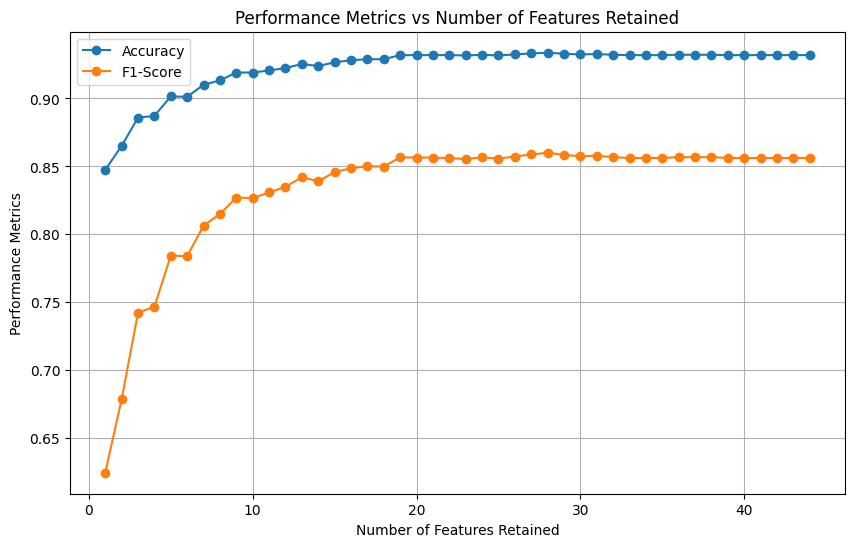

Optimal Selected Features:
 Index(['Age', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'MonthlyDebtPayments', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'PaymentHistory', 'LengthOfCreditHistory', 'MonthlyIncome', 'NetWorth',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'EmploymentStatus_Unemployed', 'EducationLevel_Bachelor',
       'EducationLevel_Doctorate', 'EducationLevel_High School',
       'EducationLevel_Master', 'HomeOwnershipStatus_Other',
       'HomeOwnershipStatus_Rent'],
      dtype='object')


In [9]:

from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Step 2.3
# To perform Recursive Feature Elimination (RFE)
log_reg_model = LogisticRegression(max_iter=1000, random_state=48682764)# Random_state has been assumed to be Student ID.

# To initialize RFE with Logistic Regression as the estimator
rfe = RFE(log_reg_model, n_features_to_select=1)

# To fit the RFE model
rfe.fit(X_train_scaled, y_train)

# To initialize lists to store metrics during RFE
accuracy_scores = []
f1_scores = []

# To loop over each step, where each step removes one feature
for i in range(1, X_train_scaled.shape[1] + 1):
    rfe = RFE(log_reg_model, n_features_to_select=i)
    rfe.fit(X_train_scaled, y_train)
    
    # To get predictions on the test data
    y_test_pred = rfe.predict(X_test_scaled)
    
    # To calculate accuracy and f1-score
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # To append the metrics to the list
    accuracy_scores.append(acc)
    f1_scores.append(f1)
    
    # To Print progress for monitoring
    print(f"Number of Features Retained: {i} | Accuracy: {acc:.4f} | F1-Score: {f1:.4f}")

#  Visualization of performance metrics

# To create a plot for accuracy and f1-score vs number of features
plt.figure(figsize=(10, 8))
plt.plot(range(1, X_train_scaled.shape[1] + 1), accuracy_scores, label='Accuracy', marker='o')
plt.plot(range(1, X_train_scaled.shape[1] + 1), f1_scores, label='F1-Score', marker='o')
plt.title('Performance Metrics vs Number of Features Retained')
plt.xlabel('Number of Features Retained')
plt.ylabel('Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()


# Here,I have selected 20 features, as this value maximizes both the accuracy and F1-score while keeping the feature count manageable.
optimal_features = 20

# Here I have Rerun RFE with optimal number of features
rfe_optimal = RFE(log_reg_model, n_features_to_select=optimal_features)
rfe_optimal.fit(X_train_scaled, y_train)

# To Get the selected features
# Here, I have reference X_train (the original DataFrame with column names) rather than the scaled NumPy array
selected_features = X_train.columns[rfe_optimal.support_]

# To Display the selected features
print("Optimal Selected Features:\n", selected_features)







 


In [ ]:
## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [15]:
from sklearn.neighbors import KNeighborsClassifier


# I have used the selected features from Step 2.3
X_train_selected = X_train_scaled[:, rfe_optimal.support_]
X_test_selected = X_test_scaled[:, rfe_optimal.support_]

# To initialize the 1-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=1)

# To train the model on the training data
knn_model.fit(X_train_selected, y_train)

# To predict on training data
train_predictions_knn = knn_model.predict(X_train_selected)

# To predict on testing data
test_predictions_knn = knn_model.predict(X_test_selected)

# To perform evaluation on training data
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
train_f1_knn = f1_score(y_train, train_predictions_knn)

# To perform evaluation on testing data
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)
test_f1_knn = f1_score(y_test, test_predictions_knn)

# To  print the results
print(f"Training Accuracy: {train_accuracy_knn:.4f}, Training F1-Score: {train_f1_knn:.4f}")
print(f"Testing Accuracy: {test_accuracy_knn:.4f}, Testing F1-Score: {test_f1_knn:.4f}")




Training Accuracy: 1.0000, Training F1-Score: 1.0000
Testing Accuracy: 0.8477, Testing F1-Score: 0.6667


**Training Accuracy:** 1.0000  
**Training F1-Score:** 1.0000  

**Testing Accuracy:** 0.8477  
**Testing F1-Score:** 0.6667  

**Conclusion:**  
There might be a slight overfitting, but the difference is minimal.


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

The best value for K is: 13
Training Accuracy: 0.8770, Training F1-Score: 0.8645
Testing Accuracy: 0.8555, Testing F1-Score: 0.8386


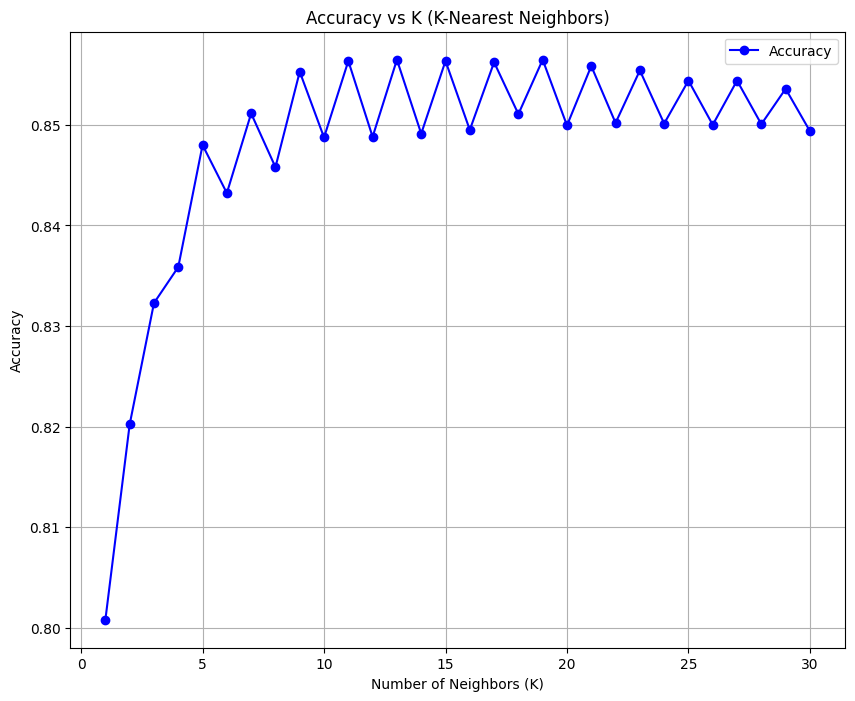

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# I will set up the parameter grid for the KNN classifier. 
# I want to search for the optimal K in the range of 1 to 30 neighbors.
param_grid = {'n_neighbors': np.arange(1, 31)}

# To initialize the KNN classifier.
knn = KNeighborsClassifier()

# I set up the GridSearchCV using 5-fold cross-validation and accuracy as the scoring metric.
# The goal here is to find the K value that provides the highest accuracy.
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# I’ll fit the grid search on the training data to perform the search.
grid_search.fit(X_train_scaled, y_train)

# Once the grid search is done, I’ll extract the best K value that gives the highest accuracy.
best_k = grid_search.best_params_['n_neighbors']
print(f"The best value for K is: {best_k}")

# I’ll now train the KNN classifier using the best value of K.
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

#I'll evaluate the classifier on both the training and testing datasets.
train_predictions = best_knn.predict(X_train_scaled)
test_predictions = best_knn.predict(X_test_scaled)

# I have calculated accuracy and F1-score for both training and testing sets.
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_f1 = f1_score(y_train, train_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# To print out the results
print(f"Training Accuracy: {train_accuracy:.4f}, Training F1-Score: {train_f1:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}, Testing F1-Score: {test_f1:.4f}")

# I’ll now visualize the change in accuracy with respect to different values of K.
# I’ll retrieve the results from the grid search.
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_test_scores = results['mean_test_score']

# For plotting the line chart for accuracy vs K values.
plt.figure(figsize=(10, 8))
plt.plot(k_values, mean_test_scores, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy vs K (K-Nearest Neighbors)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()




### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?


Evaluating KNN with euclidean distance:
Accuracy: 0.8555, F1-Score: 0.8386

Evaluating KNN with manhattan distance:
Accuracy: 0.8724, F1-Score: 0.8610

Evaluating KNN with cosine distance:
Accuracy: 0.8646, F1-Score: 0.8538


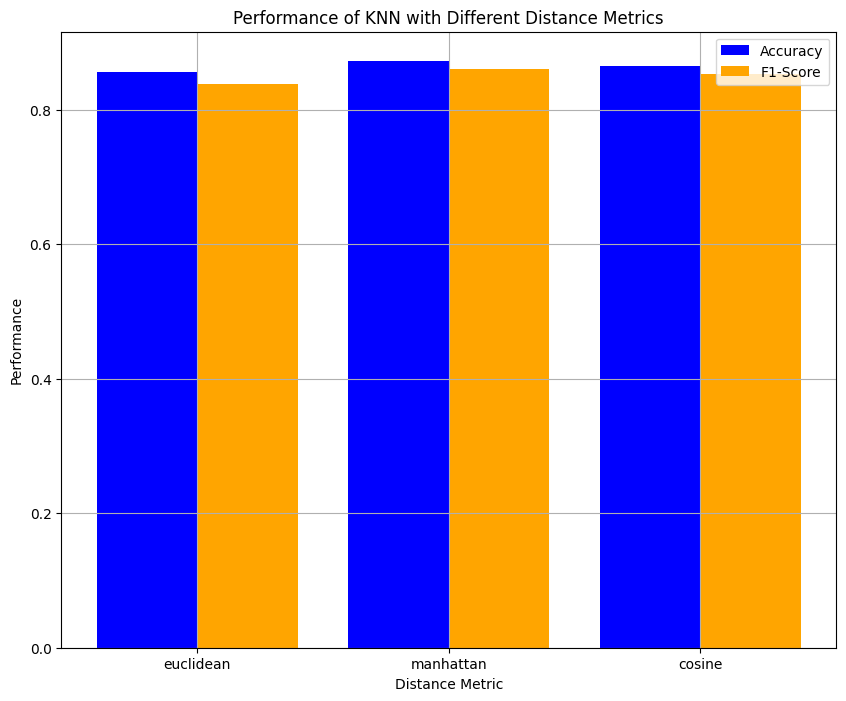

In [30]:

# Step 1: I’ll define a dictionary to store the performance metrics for each distance type.
distance_metrics = ['euclidean', 'manhattan', 'cosine']
accuracy_scores = []
f1_scores = []

# Loop through the distance metrics and evaluate KNN performance for each one.
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric} distance:")
    
# Initialize the KNN classifier with the specified distance metric.
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    
# Train the classifier on the training data.
    knn.fit(X_train_scaled, y_train)
    
# Make predictions on the test data.
    test_predictions = knn.predict(X_test_scaled)
    
# Calculate accuracy and F1-score on the test data.
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    
# Append the results to the lists.
    accuracy_scores.append(test_accuracy)
    f1_scores.append(test_f1)
    
# Print out the performance for the current distance metric.
    print(f"Accuracy: {test_accuracy:.4f}, F1-Score: {test_f1:.4f}")

#  I’ll now visualize the performance metrics for each distance type using a bar chart.
# I’ll create an array of indexes for the bars.
x = np.arange(len(distance_metrics))

# Plotting the bar chart for Accuracy.
plt.figure(figsize=(10, 8))
plt.bar(x - 0.2, accuracy_scores, 0.4, label='Accuracy', color='blue')
plt.bar(x + 0.2, f1_scores, 0.4, label='F1-Score', color='orange')

# Setting the labels, title, and ticks.
plt.xlabel('Distance Metric')
plt.ylabel('Performance')
plt.title('Performance of KNN with Different Distance Metrics')
plt.xticks(x, distance_metrics)
plt.legend()
plt.grid(True)

# To show the plot.
plt.show()

# I will now compare the performance metrics and identify the best and worst distance metrics.
best_metric = distance_metrics[np.argmax(accuracy_scores)]
worst_metric = distance_metrics[np.argmin(accuracy_scores)]



### KNN Performance Evaluation with Different Distance Metrics:

1. **Evaluating KNN with Euclidean Distance** (L2 norm):
   - **Accuracy**: 0.8555
   - **F1-Score**: 0.8386
   - **Interpretation**: Euclidean distance works well with continuous data where the distance between points is crucial, but in this case, it yields slightly lower accuracy compared to other metrics.

2. **Evaluating KNN with Manhattan Distance** (L1 norm):
   - **Accuracy**: 0.8724
   - **F1-Score**: 0.8610
   - **Interpretation**: Manhattan distance outperforms Euclidean in this scenario, especially when dealing with high-dimensional data or when the data aligns in a grid-like structure, resulting in the highest accuracy and F1-score.

3. **Evaluating KNN with Cosine Distance**:
   - **Accuracy**: 0.8646
   - **F1-Score**: 0.8538
   - **Interpretation**: Cosine distance performs reasonably well, though not as high as Manhattan distance.

